In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('2019.csv')

In [3]:
df.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [4]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [5]:
#boslukları _ ile doldurduk.
df.columns=df.columns.str.replace(' ','_')

In [6]:
df.columns

Index(['Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [9]:
#156 satır 9 sütun
df.shape

(156, 9)

In [10]:
# data type düzgün
df.dtypes

Overall_rank                      int64
Country_or_region                object
Score                           float64
GDP_per_capita                  float64
Social_support                  float64
Healthy_life_expectancy         float64
Freedom_to_make_life_choices    float64
Generosity                      float64
Perceptions_of_corruption       float64
dtype: object

In [11]:
# eksik veri yok
df.isnull().sum()

Overall_rank                    0
Country_or_region               0
Score                           0
GDP_per_capita                  0
Social_support                  0
Healthy_life_expectancy         0
Freedom_to_make_life_choices    0
Generosity                      0
Perceptions_of_corruption       0
dtype: int64

In [27]:
df=df.rename(columns={"Economy_(GDP_per_Capita)":"Economy","Health_(Life_Expectancy)":"Life_Expectancy",
                      "Trust_(Government_Corruption)":"Government_Corruption",
                      "Happiness_Rank":"Rank"
                      })

In [13]:
df.columns

Index(['Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

> # TOP 10 HAPPINES COUNTRY

In [16]:
# 156 ülke var
len(df["Country_or_region"].unique())

156

<AxesSubplot:xlabel='Score', ylabel='Country_or_region'>

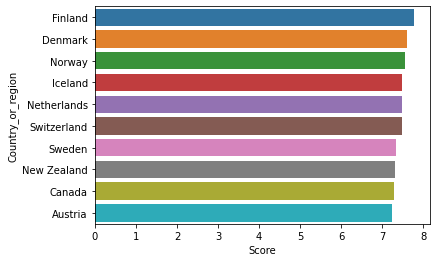

In [19]:
# En mutlu 10 ülke
sns.barplot(y = df["Country_or_region"][:10], x = df["Score"][:10])

<AxesSubplot:xlabel='Score', ylabel='Country_or_region'>

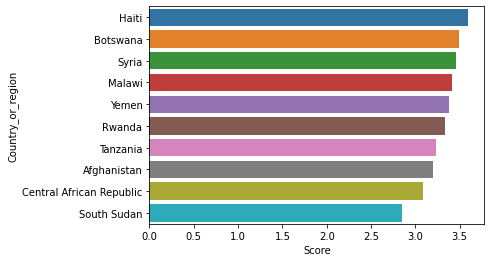

In [20]:
#En mutsuz 10 ülke
sns.barplot(y = df["Country_or_region"][-10:], x = df["Score"][-10:])

In [25]:
#2019 yılında turkıye 78. sırada
df_turkiye = df[df["Country_or_region"] == "Turkey"]
df_turkiye

,Overall_rank,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
78,79,Turkey,5.373,1.183,1.36,0.808,0.195,0.083,0.106


<AxesSubplot:xlabel='Score', ylabel='Country_or_region'>

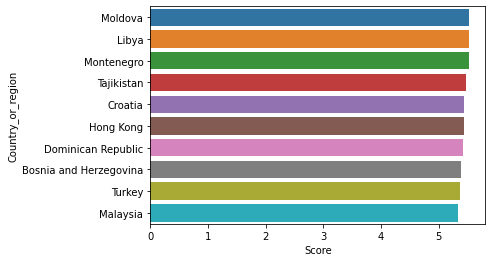

In [26]:
sns.barplot(y = df["Country_or_region"][70:80], x = df["Score"][70:80])

In [28]:
df=df.rename(columns={"Country_or_region":"Country", "Score":"Happiness_Score"
                      })

> # Others Factor

In [29]:
df.columns

Index(['Overall_rank', 'Country', 'Happiness_Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

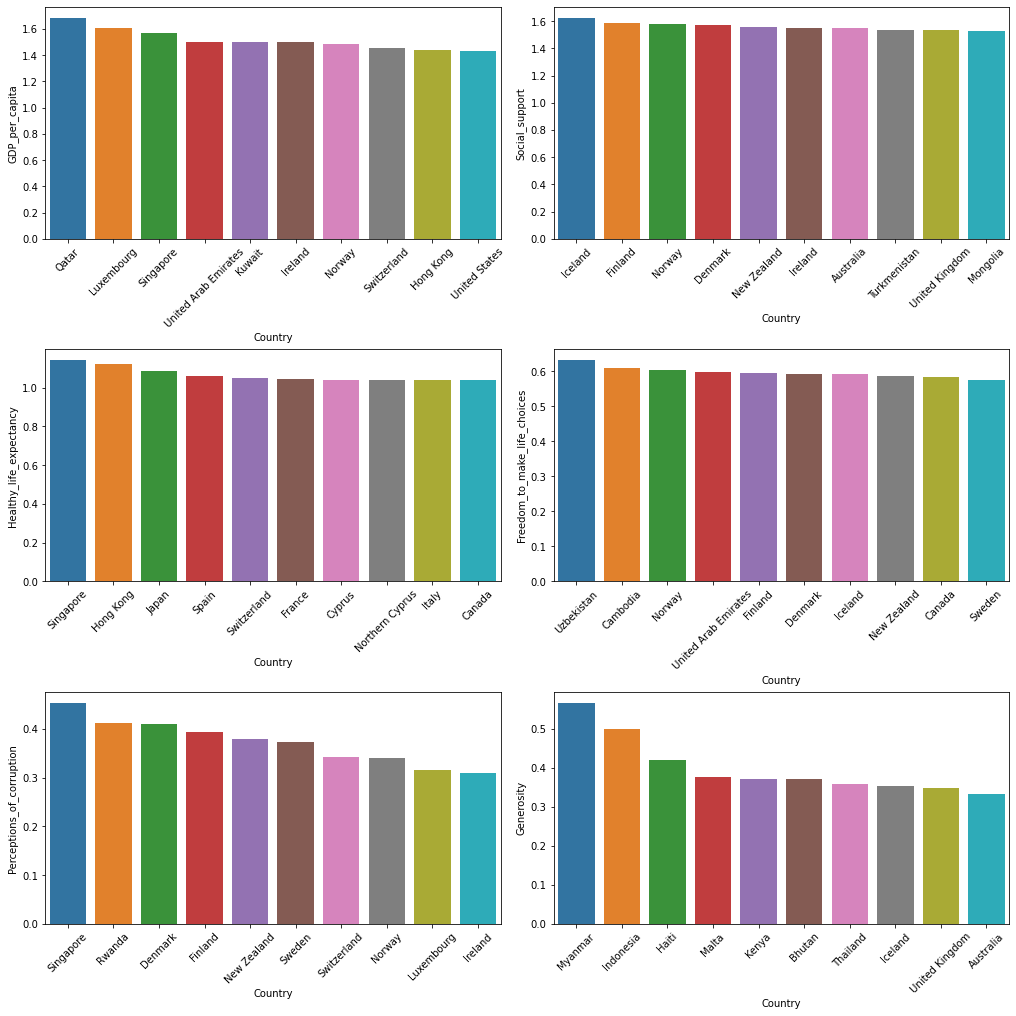

In [31]:
f, axs = plt.subplots(3,2, figsize = (14,14), constrained_layout = True)

sort_eco = df.sort_values(by = ['GDP_per_capita'], ascending = False)
sort_eco = sort_eco.head(10)
sort_fa = df.sort_values(by = ['Social_support'], ascending = False)
sort_fa = sort_fa.head(10)
sort_he = df.sort_values(by = ['Healthy_life_expectancy'], ascending = False)
sort_he = sort_he.head(10)
sort_free = df.sort_values(by = ['Freedom_to_make_life_choices'], ascending = False)
sort_free = sort_free.head(10)
sort_gc = df.sort_values(by = ['Perceptions_of_corruption'], ascending = False)
sort_gc = sort_gc.head(10)
sort_genero = df.sort_values(by = ['Generosity'], ascending = False)
sort_genero = sort_genero.head(10)

ax=sns.barplot(x="Country", y="GDP_per_capita", data=sort_eco, ax = axs[0, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Social_support", data=sort_fa, ax = axs[0, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Healthy_life_expectancy", data=sort_he, ax = axs[1, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Freedom_to_make_life_choices", data=sort_free, ax = axs[1, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Perceptions_of_corruption", data = sort_gc, ax = axs[2, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Generosity", data=sort_genero, ax = axs[2, 1])
ax.tick_params(axis = 'x', rotation = 45)

In [33]:
df1=pd.read_csv('2015.csv')
df2=pd.read_csv('2016.csv')
df3=pd.read_csv('2017.csv')
df4=pd.read_csv('2018.csv')

In [34]:
df1.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [35]:
df1.columns=df1.columns.str.replace(' ','_')

In [37]:
df2.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [38]:
df2.columns=df2.columns.str.replace('.','_')

In [39]:
df2.columns=df2.columns.str.replace('__','_')

In [40]:
df2.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [41]:
df3.head(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [42]:
df4.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
5,6,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295
6,7,Canada,7.328,1.330,1.532,0.896,0.653,0.321,0.291
7,8,New Zealand,7.324,1.268,1.601,0.876,0.669,0.365,0.389
8,9,Sweden,7.314,1.355,1.501,0.913,0.659,0.285,0.383
9,10,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.302


In [43]:
df4.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
5,6,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295
6,7,Canada,7.328,1.330,1.532,0.896,0.653,0.321,0.291
7,8,New Zealand,7.324,1.268,1.601,0.876,0.669,0.365,0.389
8,9,Sweden,7.314,1.355,1.501,0.913,0.659,0.285,0.383
9,10,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.302
